In [19]:
from transformers import BertTokenizer, BertModel
import torch
import pandas as pd 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [4]:
df = pd.read_excel('reviews.xlsx',sheet_name='Hoja 8')

In [5]:
df.head()

,Reseña,Longitud,English,Sentiment,Corrected
0,"Llevo 8 meses con la caminadora, me ha sido mu...",247,I've been using the treadmill for eight months...,Positive,POSITIVE
1,"Es lo que necesitaba para ejercitarme, buena c...",52,"It's what I needed to exercise, good quality",positive,POSITIVE
2,"FACIL DE USAR, UN POCO COMPLICADO LA MANERA DE...",135,"EASY TO USE, A LITTLE COMPLICATED IN THE ASSEM...",Positive,POSITIVE
3,Necesito que me ayuden a contactar alguien que...,77,I need help contacting someone who can activat...,Negative,NEGATIVE
4,Se compro una en marzo 2021 en menos de un año...,645,I bought one in March 2021. It broke down in l...,Negative,NEGATIVE


In [6]:
# Cargar el modelo y el tokenizador BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


In [7]:
df['inputs'] = df['English'].map(lambda text:tokenizer(text, return_tensors="pt", padding=True, truncation=True))

In [9]:
df['outputs'] = df['inputs'].map(lambda inputs:model(**inputs))
df['embedding'] = df['outputs'].map(lambda outputs:outputs.last_hidden_state.mean(dim=1))

In [11]:
df['embedding_list'] = df['embedding'].map(lambda emb: emb.squeeze().tolist())

In [15]:
emb = pd.DataFrame(df['embedding_list'].apply(pd.Series))

In [18]:
emb

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.105258,-0.071843,0.075819,-0.106018,0.394864,-0.258562,0.078290,0.723357,-0.011565,-0.162079,...,-0.122869,-0.078222,0.024189,-0.249476,0.071971,-0.385375,0.162081,-0.356433,-0.318646,-0.154275
1,0.311585,-0.016458,-0.043049,0.056620,-0.101626,-0.112600,0.493296,0.731982,-0.108362,-0.095739,...,-0.092352,-0.082601,0.091392,0.090367,0.031893,-0.051123,-0.447648,-0.120684,-0.186877,-0.275964
2,-0.471231,-0.147660,0.136406,0.610578,0.113595,-0.155078,0.023017,0.192491,-0.019637,-0.046802,...,-0.177714,-0.342603,-0.086822,-0.693164,0.035820,-0.068593,-0.229960,-0.216775,-0.246483,0.029556
3,0.226698,0.166630,0.269436,0.193536,0.267980,-0.138027,0.351109,0.295227,-0.072227,-0.335909,...,-0.078520,-0.193087,0.049575,-0.185211,0.200991,-0.228773,-0.170136,-0.146891,-0.085376,0.333589
4,-0.062912,-0.042484,0.327963,0.134977,0.462939,-0.093812,0.029431,0.679384,0.023544,-0.089140,...,-0.119263,-0.195644,0.137570,-0.334910,-0.035923,-0.243676,-0.088685,-0.156553,0.043377,0.072622
5,0.100016,0.014923,0.205237,0.027216,0.483341,-0.419287,0.192469,0.775968,-0.203030,-0.171909,...,-0.348741,0.274085,0.057627,-0.258923,0.064032,-0.051176,-0.038675,-0.026891,0.176966,-0.271334
6,0.097710,-0.158195,0.314804,0.099451,0.057426,-0.263543,-0.062529,0.496152,0.257280,-0.378589,...,-0.189461,-0.267725,0.082104,-0.381444,-0.284485,-0.178712,0.261917,-0.114267,-0.114107,0.066133
7,0.043866,-0.024086,0.243787,0.000191,0.484165,-0.199578,0.145731,0.604227,0.079106,-0.032633,...,-0.460872,-0.037331,0.046913,-0.197705,0.019195,-0.260951,-0.013417,-0.104640,0.060507,-0.195335
8,-0.039449,-0.221774,0.284985,0.075311,0.254215,-0.114029,0.158558,0.216042,0.125626,0.046156,...,-0.196086,-0.186168,-0.083453,-0.387224,-0.233177,-0.077735,-0.101745,-0.170721,-0.148839,0.169073
9,0.080501,-0.022184,0.392755,0.017591,0.542733,-0.119072,0.064215,0.508686,0.092247,-0.073960,...,-0.349860,-0.055165,0.014258,-0.342126,-0.086551,-0.049558,0.056993,-0.132636,-0.070760,0.033334


In [21]:
pipe = make_pipeline(StandardScaler(),PCA(n_components=2),MinMaxScaler())
pipe.fit_transform(emb)
emb_pca = pd.DataFrame(pipe.transform(emb),columns=['PCA1','PCA2'])
emb_pca.head()

,PCA1,PCA2
0,0.037602,4.010005e-01
1,0.024920,5.032707e-01
2,0.374568,6.701064e-01
3,0.062339,1.332268e-15
4,0.182284,4.787992e-01


In [22]:
emb_pca['sentiment'] = df['Corrected']

In [24]:
import seaborn as sns

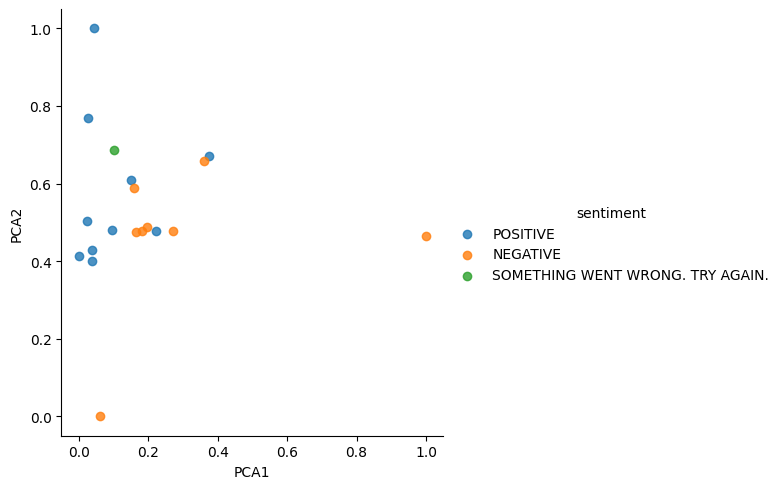

In [25]:
sns.lmplot(x='PCA1',y='PCA2',data=emb_pca,hue='sentiment',fit_reg=False)

In [26]:
emb_pca.to_clipboard()